# Modeling 
This final phase of the NBA MVP Prediction Project will be concluded with modeling. In this notebook, we will recall the data from preprocessing that has been standardized and begin testing different parameters and models. Once the models have been selected, we will test each model for accuracy, mean absolute error and r2 score. Overall, the goal of the model is to predict the NBA MVP for any given season.

In [74]:
#Core packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

#To save results to images
import dataframe_image as dfi

#To surpress warnings
import warnings
warnings.filterwarnings('ignore')

#Adjusting display settings
%matplotlib inline
pd.set_option('display.max_columns',None)

#Packages used for modeling
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



The first step is to load in the dataframes created from the previous phases, this notebook will be focusing in on the final dataframes created in preprocessing

In [75]:
df_per_35 = pd.read_csv('../data/df_per_35.csv')
testing_df = pd.read_csv('../data/testing_df.csv')

In [76]:
df_per_35.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,season,player,pos,age,g,team_id,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,mvp_won
0,0,0,0,0,1982,Kareem Abdul-Jabbar,C,34,76,LAL,76,35.0,9.843750,17.002841,0.575710,0.000000,0.000000,0.000000,9.843750,17.002841,0.576705,0.575710,4.076705,5.767045,0.701989,2.286932,6.363636,8.650568,2.982955,0.795455,2.684659,2.982955,2.883523,23.764205,2661.789773,23.267045,0.604545,0.001989,0.338068,7.258523,18.991477,13.323864,11.832386,1.093750,4.076705,13.224432,25.454545,6.860795,3.877841,10.639205,0.190909,3.778409,1.193182,4.971591,4.673295,0.045,4.842330,4.345170,0.691051,No
1,1,1,1,1,1982,Alvan Adams,C,27,79,PHO,75,35.0,7.392739,15.016502,0.570627,0.000000,0.000000,0.000000,7.392739,15.016502,0.570627,0.570627,2.656766,3.349835,0.902145,1.963696,6.584158,8.547855,5.198020,1.617162,1.155116,2.887789,3.927393,17.442244,2764.191419,21.485149,0.611056,0.001155,0.262211,7.623762,23.333333,15.709571,25.528053,2.656766,2.194719,17.095710,26.336634,2.887789,5.429043,8.316832,0.166337,1.617162,2.541254,4.158416,3.927393,0.000,3.985149,3.523102,0.648020,No
2,2,2,2,2,1982,Mark Aguirre,SF,22,51,DAL,20,35.0,9.114583,19.565972,0.565104,0.607639,1.701389,0.427778,8.506944,17.864583,0.577257,0.583333,4.010417,5.833333,0.826389,2.065972,3.767361,5.954861,3.888889,0.850694,0.486111,3.159722,3.645833,22.725694,1784.027778,21.024306,0.624653,0.105729,0.365799,8.142361,15.677083,11.788194,22.604167,1.458333,1.093750,15.434028,36.215278,1.215278,0.972222,2.309028,0.074132,2.795139,-1.944444,0.850694,1.215278,0.000,-5.383681,-5.444444,0.414410,No
3,3,3,3,3,1982,Danny Ainge,SG,22,53,BOS,1,35.0,4.952830,13.867925,1.178774,0.330189,0.990566,0.970755,4.622642,12.547170,1.198585,1.218396,3.632075,3.962264,2.846226,1.650943,1.981132,3.632075,5.283019,2.311321,0.330189,3.301887,5.283019,13.537736,1862.264151,33.349057,1.449528,0.254245,0.970755,16.509434,19.481132,18.160377,65.047170,10.235849,0.990566,57.783019,70.990566,-0.990566,2.641509,1.650943,0.138679,-12.216981,3.301887,-8.915094,-0.330189,0.000,21.066038,20.966981,2.535849,No
4,4,4,4,4,1982,Tiny Archibald,PG,33,68,BOS,51,35.0,4.937304,10.532915,0.517868,0.109718,0.219436,0.411442,4.827586,10.313480,0.521160,0.523354,3.840125,5.047022,0.819592,0.438871,1.426332,1.865204,8.777429,0.877743,0.000000,2.852665,2.084639,13.824451,2377.586207,15.689655,0.594671,0.027429,0.532132,1.426332,4.937304,3.181818,35.000000,1.206897,0.109718,20.188088,19.639498,3.730408,1.974922,5.705329,0.126176,1.536050,-1.426332,0.109718,1.206897,0.000,7.000000,6.967085,0.842633,No


In [77]:
testing_df.head()

,Unnamed: 0,season,player,fg_pct,blk_pct,usg_pct,vorp,fg3_pct,tov_per_g,drb_per_g,tov_pct,award_share
0,0,1982,Kareem Abdul-Jabbar,0.575710,4.076705,25.454545,4.673295,0.000000,2.982955,6.363636,13.224432,0.045
1,1,1982,Alvan Adams,0.570627,2.194719,26.336634,3.927393,0.000000,2.887789,6.584158,17.095710,0.000
2,2,1982,Mark Aguirre,0.565104,1.093750,36.215278,1.215278,0.427778,3.159722,3.767361,15.434028,0.000
3,3,1982,Danny Ainge,1.178774,0.990566,70.990566,-0.330189,0.970755,3.301887,1.981132,57.783019,0.000
4,4,1982,Tiny Archibald,0.517868,0.109718,19.639498,1.206897,0.411442,2.852665,1.426332,20.188088,0.000


In [78]:
#Defining the models
linear = LinearRegression()
forest = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='auto', min_samples_leaf=4, min_samples_split=5, random_state=1)
xgb = XGBRegressor(n_estimators=23, max_depth=4, learning_rate=0.2)
lgb = LGBMRegressor(n_estimators=23, learning_rate=.15,max_depth=4,random_state=0)

Next, we will look at the testing dataframe and ensure it is ready for modeling. Any null values that may remain due to changes made in prior notebooks will be checked and removed, then the object datatypes will be dropped from the testing dataframe in order to allow us to begin testing models. 

In [79]:
testing_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [80]:
print(testing_df.isin([np.nan, np.inf, -np.inf]).sum())

season         0
player         0
fg_pct         0
blk_pct        0
usg_pct        0
vorp           0
fg3_pct        0
tov_per_g      0
drb_per_g      1
tov_pct        0
award_share    0
dtype: int64


In [81]:
testing_df = testing_df.replace([np.inf, -np.inf], 0)

In [82]:
print(testing_df.isin([np.nan, np.inf, -np.inf]).sum())

season         0
player         0
fg_pct         0
blk_pct        0
usg_pct        0
vorp           0
fg3_pct        0
tov_per_g      0
drb_per_g      0
tov_pct        0
award_share    0
dtype: int64


In [83]:
#Reviewing the dataframe after making chaanges
testing_df.head()

,season,player,fg_pct,blk_pct,usg_pct,vorp,fg3_pct,tov_per_g,drb_per_g,tov_pct,award_share
0,1982,Kareem Abdul-Jabbar,0.575710,4.076705,25.454545,4.673295,0.000000,2.982955,6.363636,13.224432,0.045
1,1982,Alvan Adams,0.570627,2.194719,26.336634,3.927393,0.000000,2.887789,6.584158,17.095710,0.000
2,1982,Mark Aguirre,0.565104,1.093750,36.215278,1.215278,0.427778,3.159722,3.767361,15.434028,0.000
3,1982,Danny Ainge,1.178774,0.990566,70.990566,-0.330189,0.970755,3.301887,1.981132,57.783019,0.000
4,1982,Tiny Archibald,0.517868,0.109718,19.639498,1.206897,0.411442,2.852665,1.426332,20.188088,0.000


In [84]:
#Creating a variable to remove the player column as needed
to_drop = 'player'

In this step of the notebook, we will be creating functions that are capable of training, testing and splitting the data by season. We are splitting the data by season in order to look at the actual MVP for a given season while predicting the MVP for that same season based on the columns we defined as highly correlated to the award_share metric in previous notebooks. After preforming this train, test, split function, another function will be created to define the model that is going to be used, provide it the parameters needed for testing and making a prediction. Finally, one last function will be defined that will take the input of the prior two functions, create a list of key results and return a dataframe that will summarize all of the results in one place.

The function below will do the following:

Splits the data into train and test sets based on a given season and returns the features and labels for each set.
    
    Args:
    - season: int, the season to use as the test set
    - df: pandas DataFrame, the data to split
    - save_columns: list of str, the columns to keep in the final dataframes
    - scaling: bool, whether to scale the data using StandardScaler
    
    Returns:
    - X_train: numpy array, the feature matrix for the training set
    - y_train: numpy array, the label vector for the training set
    - X_test: numpy array, the feature matrix for the test set
    - y_test: numpy array, the label vector for the test set
    - cols: list of str, the column names of the feature matrix

In [85]:
def train_test_split_by_season(season, df, scaling=False):
    
    # Filter the data based on the given season
    train_df = df[df['season'] != season]
    test_df = df[df['season'] == season]
    
    # Copy the filtered dataframes and select the columns to save 
    train_df2 = train_df.copy()
    test_df2 = test_df.copy()
    
    train_df2.drop(to_drop, inplace=True, axis=1)
    test_df2.drop(to_drop, inplace=True, axis=1)
    
    # Scale the data if required
    if scaling == True:
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        train_df2 = sc_X.fit_transform(train_df2)
        test_df2 = sc_y.fit_transform(test_df2)
  
    # Split the data into features and labels
    X_train = train_df2.copy()
    y_train = X_train["award_share"]
    
    X_test = test_df2.copy()
    y_test = X_test['award_share']
    
    # Remove the label column from the feature matrix
    X_train.drop('award_share', axis=1, inplace=True)
    cols = X_train.columns
    X_test.drop('award_share', axis=1, inplace=True)
    
    # Convert the dataframes to numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    return X_train, y_train, X_test, y_test, cols

In [86]:
def run_model(method, X_train, y_train, X_test, y_test, df, season):
    model = method
    model.fit(X_train, y_train) 
    predictions = model.predict(X_test)
    mae = mean_absolute_error(predictions, y_test)
    r2 = r2_score(y_test, predictions)
    
    mvp_race = df[df['season'] == season]
    mvp_race['predicted_share'] = predictions
    mvp_race = mvp_race.sort_values(["award_share", "predicted_share"], ascending = (False, False))
                                    
    actual_winner = mvp_race[mvp_race['award_share'] == mvp_race['award_share'].max()]['player']
    predicted_winner = mvp_race[mvp_race['predicted_share'] == mvp_race['predicted_share'].max()]['player']
    return model, mae, r2, predicted_winner.iloc[0], actual_winner.iloc[0], mvp_race

In [87]:
seasons = [season for season in range(1982, 2022)]

def run_model_average(df, method, scaling=False, print_metrics=False):
    mae_lst = []
    r2_lst = []
    predicted_lst = []
    actual_lst = []
    label_lst =[]
    method_lst = []
    for season in tqdm(seasons):
        X_train, y_train, X_test, y_test, cols = train_test_split_by_season(season=season, df=df, scaling=False)
        
        method, mae, r2, predicted_winner, actual_winner, mvp_race = run_model(method, X_train, y_train, X_test, y_test, df=df,season=season)
        if predicted_winner == actual_winner:
            label = 'Correct'
        else:
            label = 'Incorrect'
        mae_lst.append(mae)
        r2_lst.append(r2)
        predicted_lst.append(predicted_winner)
        actual_lst.append(actual_winner)
        label_lst.append(label)
        method_lst.append(method)
    results = {
    'season': seasons,
    'MAE': mae_lst,
    'R squared': r2_lst,
    'Predicted MVP': predicted_lst,
    'Actual MVP': actual_lst,
    'Label': label_lst
    }

    summary = pd.DataFrame(results)
    correct_count = summary['Label'].value_counts().iloc[0]
    incorrect_count = summary['Label'].value_counts().iloc[1]
    accuracy = correct_count / (correct_count + incorrect_count)
    avg_mae = summary['MAE'].mean()
    avg_r2  = summary['R squared'].mean()
    
    if print_metrics == True:
        print(f"Average MAE: {avg_mae}")
        print(f"Average R squared: {avg_r2}")
        print(f"Prediction accuracy: {accuracy}")
    return avg_mae, avg_r2, accuracy, summary, method_lst, cols

Now that the functions have been defined to train, test and split the data, the preprocessed data will be placed into models and predictions will be made

In [88]:
rf_avg_mae, rf_avg_r2, rf_accuracy, rf_summary, rf_method, rf_cols = run_model_average(df=testing_df, method=forest, print_metrics=True)


100%|██████████| 40/40 [03:30<00:00,  5.25s/it]

Average MAE: 0.004952964691509692
Average R squared: 0.6140492582070533
Prediction accuracy: 0.55


In [89]:
rf_summary

,season,MAE,R squared,Predicted MVP,Actual MVP,Label
0,1982,0.006885,0.470475,Julius Erving,Moses Malone,Incorrect
1,1983,0.006969,0.354651,Larry Bird,Moses Malone,Incorrect
2,1984,0.005825,0.566740,Larry Bird,Larry Bird,Correct
3,1985,0.005019,0.813651,Larry Bird,Larry Bird,Correct
4,1986,0.006136,0.747913,Larry Bird,Larry Bird,Correct
5,1987,0.005620,0.783386,Michael Jordan,Magic Johnson,Incorrect
6,1988,0.005433,0.747099,Michael Jordan,Michael Jordan,Correct
7,1989,0.004859,0.786126,Michael Jordan,Magic Johnson,Incorrect
8,1990,0.004978,0.784539,Michael Jordan,Magic Johnson,Incorrect
9,1991,0.004588,0.839242,Michael Jordan,Michael Jordan,Correct


In [90]:
lgbm_avg_mae, lgbm_avg_r2, lgbm_accuracy, lgbm_summary, lgbm_method, lgbm_cols = run_model_average(df=testing_df, method=lgb,
                 scaling=False, print_metrics=True)

100%|██████████| 40/40 [00:01<00:00, 21.91it/s]

Average MAE: 0.005303160488155268
Average R squared: 0.5924659381475917
Prediction accuracy: 0.55


In [91]:
lgbm_summary

,season,MAE,R squared,Predicted MVP,Actual MVP,Label
0,1982,0.006657,0.408026,Julius Erving,Moses Malone,Incorrect
1,1983,0.006955,0.332917,Larry Bird,Moses Malone,Incorrect
2,1984,0.006207,0.515304,Larry Bird,Larry Bird,Correct
3,1985,0.006199,0.792554,Larry Bird,Larry Bird,Correct
4,1986,0.005625,0.743452,Larry Bird,Larry Bird,Correct
5,1987,0.005247,0.749248,Michael Jordan,Magic Johnson,Incorrect
6,1988,0.006627,0.643987,Michael Jordan,Michael Jordan,Correct
7,1989,0.005509,0.712742,Michael Jordan,Magic Johnson,Incorrect
8,1990,0.006179,0.712550,Michael Jordan,Magic Johnson,Incorrect
9,1991,0.005518,0.760871,Michael Jordan,Michael Jordan,Correct


In [92]:
xgb_avg_mae, xgb_avg_r2, xgb_accuracy, xgb_summary, xgb_method, xgb_cols = run_model_average(df=testing_df, method=xgb,
                 scaling=False, print_metrics=True)

100%|██████████| 40/40 [00:04<00:00,  9.27it/s]

Average MAE: 0.00805013232473218
Average R squared: 0.578355431601253
Prediction accuracy: 0.525


In [93]:
xgb_summary

,season,MAE,R squared,Predicted MVP,Actual MVP,Label
0,1982,0.009885,0.401999,Julius Erving,Moses Malone,Incorrect
1,1983,0.009544,0.346742,Larry Bird,Moses Malone,Incorrect
2,1984,0.009417,0.467208,Larry Bird,Larry Bird,Correct
3,1985,0.008324,0.800288,Larry Bird,Larry Bird,Correct
4,1986,0.008363,0.734558,Larry Bird,Larry Bird,Correct
5,1987,0.008501,0.759153,Magic Johnson,Magic Johnson,Correct
6,1988,0.007724,0.756338,Michael Jordan,Michael Jordan,Correct
7,1989,0.009369,0.488518,Michael Jordan,Magic Johnson,Incorrect
8,1990,0.008496,0.712108,Michael Jordan,Magic Johnson,Incorrect
9,1991,0.006997,0.884498,Michael Jordan,Michael Jordan,Correct


In [94]:
lr_avg_mae, lr_avg_r2, lr_accuracy, lr_summary, lr_method, cols = run_model_average(df=testing_df, method=linear,
                scaling=True, print_metrics=True)


100%|██████████| 40/40 [00:00<00:00, 40.34it/s]

Average MAE: 0.020376565004542244
Average R squared: 0.15526486709156428
Prediction accuracy: 0.55


In [95]:
lr_summary

,season,MAE,R squared,Predicted MVP,Actual MVP,Label
0,1982,0.020850,0.167081,Julius Erving,Moses Malone,Incorrect
1,1983,0.022316,0.125481,Larry Bird,Moses Malone,Incorrect
2,1984,0.021026,0.169398,Larry Bird,Larry Bird,Correct
3,1985,0.021326,0.176841,Larry Bird,Larry Bird,Correct
4,1986,0.022187,0.143574,Claude Gregory,Larry Bird,Incorrect
5,1987,0.021757,0.207450,Michael Jordan,Magic Johnson,Incorrect
6,1988,0.021260,0.211517,Michael Jordan,Michael Jordan,Correct
7,1989,0.021789,0.215877,Michael Jordan,Magic Johnson,Incorrect
8,1990,0.022679,0.205566,Michael Jordan,Magic Johnson,Incorrect
9,1991,0.021229,0.216325,Michael Jordan,Michael Jordan,Correct


Here we are looking at the summary metrics for each model and highlighting the best metric from each model. LGBM Regressor returned the highest average R squared while Random Forest Regressor returned the highest accuracy; RF predicted the highest number of correct MVP winners

In [96]:
results = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'XGBoost Regressor', 'LGBM Regressor'],
    'average MAE': [lr_avg_mae,rf_avg_mae, xgb_avg_mae, lgbm_avg_mae],
    'average R squared': [lr_avg_r2,rf_avg_r2, xgb_avg_r2, lgbm_avg_r2],
    'accuracy': [lr_accuracy,rf_accuracy, xgb_accuracy, lgbm_accuracy],
}
model_summary_df = pd.DataFrame(results)
model_summary_df.style.highlight_max(subset = ['average R squared', 'accuracy'],
                       color = 'green', axis = 0)

,Model,average MAE,average R squared,accuracy
0,Linear Regression,0.020377,0.155265,0.550000
1,Random Forest Regressor,0.004953,0.614049,0.550000
2,XGBoost Regressor,0.008050,0.578355,0.525000
3,LGBM Regressor,0.005303,0.592466,0.550000


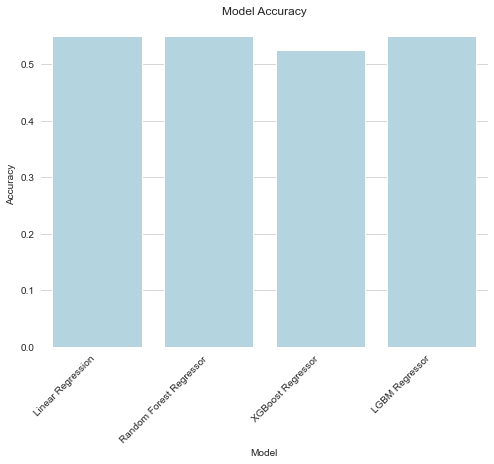

In [97]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    x="Model",
    y="accuracy",
    data=model_summary_df,
    color="lightblue",
    ax=ax,
)

sns.despine(left=True, bottom=True)
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_title("Model Accuracy")
plt.xticks(rotation=45, ha="right")

plt.show()

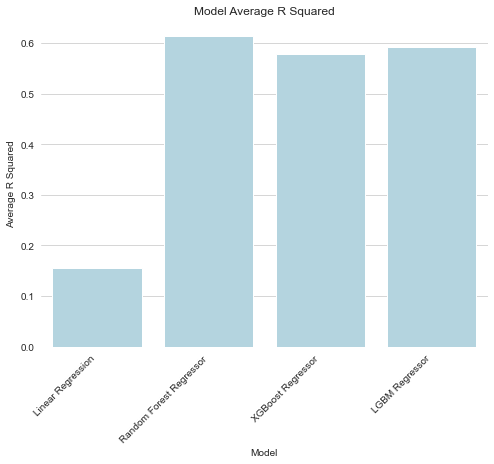

In [98]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    x="Model",
    y='average R squared',
    data=model_summary_df,
    color="lightblue",
    ax=ax,
)

sns.despine(left=True, bottom=True)
ax.set_xlabel("Model")
ax.set_ylabel("Average R Squared")
ax.set_title("Model Average R Squared")
plt.xticks(rotation=45, ha="right")

plt.show()

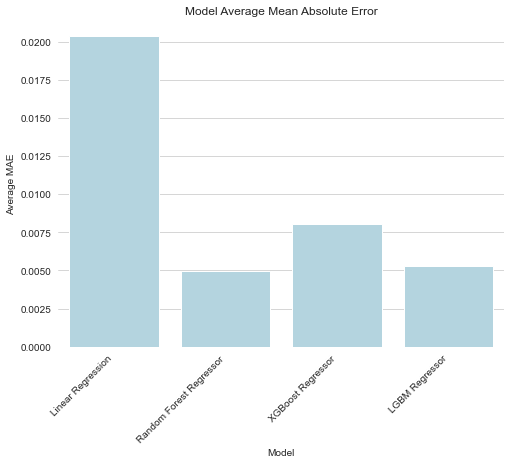

In [99]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    x="Model",
    y='average MAE',
    data=model_summary_df,
    color="lightblue",
    ax=ax,
)

sns.despine(left=True, bottom=True)
ax.set_xlabel("Model")
ax.set_ylabel("Average MAE")
ax.set_title("Model Average Mean Absolute Error")
plt.xticks(rotation=45, ha="right")

plt.show()

# Predicting the 2023 NBA MVP

In [117]:
testing_2023 = pd.read_csv('../data/NBA_2023.csv', encoding='iso-8859-1')
testing_2023.head()

,season,player,pos,age,team_id,g,gs,per,ts_per,fg3_pct,ft_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct.1,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,ft_per_g,fta_per_g,ft_pct.1,mp_per_g,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g
0,2023,Precious Achiuwa,C,23.0,TOR,54.0,11,15.1,0.552,0.262,0.316,6.3,1.3,2.6,11.3,19.3,0.8,1.3,2.1,0.092,-1.5,-0.9,-2.4,-0.1,190.0,393,0.483,27.0,103.0,0.262,163.0,290.0,0.562,0.518,87.0,124.0,0.702,20.6,1.8,4.0,5.8,0.9,0.5,0.6,1.1,1.9,9.1
1,2023,Steven Adams,C,29.0,MEM,42.0,42,17.5,0.564,0.004,0.490,11.1,1.5,3.7,19.8,14.6,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7,157.0,263,0.597,0.0,1.0,0.000,157.0,262.0,0.599,0.597,47.0,129.0,0.364,27.0,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,2023,Bam Adebayo,C,25.0,MIA,74.0,74,20.0,0.592,0.011,0.362,16.0,1.7,2.4,12.7,25.3,3.5,3.8,7.4,0.136,0.7,0.8,1.5,2.3,600.0,1111,0.540,1.0,12.0,0.083,599.0,1099.0,0.545,0.541,324.0,402.0,0.806,35.0,2.5,6.8,9.3,3.2,1.2,0.8,2.5,2.8,20.6
3,2023,Ochai Agbaji,SG,22.0,UTA,58.0,21,9.6,0.569,0.603,0.185,6.7,0.6,1.1,8.8,15.6,1.0,0.4,1.4,0.057,-1.5,-1.4,-2.9,-0.3,161.0,373,0.432,81.0,225.0,0.360,80.0,148.0,0.541,0.540,56.0,69.0,0.812,20.4,0.7,1.3,2.1,1.0,0.3,0.3,0.7,1.7,7.9
4,2023,Santi Aldama,PF,22.0,MEM,77.0,20,13.9,0.591,0.507,0.274,7.6,1.3,2.6,9.3,16.0,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1,247.0,525,0.470,94.0,266.0,0.353,153.0,259.0,0.591,0.560,108.0,144.0,0.750,21.8,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [118]:
testing_2023_rf = testing_2023.copy()
testing_2023_rf = testing_2023_rf[list(rf_cols)]

In [119]:
testing_2023_rf = testing_2023_rf.replace([np.nan, np.inf, -np.inf],0)

In [120]:
print(testing_2023_rf.isin([np.nan, np.inf, -np.inf]).sum())

season       0
fg_pct       0
blk_pct      0
usg_pct      0
vorp         0
fg3_pct      0
tov_per_g    0
drb_per_g    0
tov_pct      0
dtype: int64


In [121]:
def prep_data(df):
    #preparing the model by training it using historical data from 1982 - 2022
    future_X_train_df = df.copy()
    future_X_train_df.drop(to_drop, axis=1, inplace=True)
    future_y_train_df = future_X_train_df['award_share']
    future_X_train_df.drop(['award_share'], axis=1, inplace=True)
    
    future_X_test_df = testing_2023_rf
    
    return future_X_train_df, future_y_train_df, future_X_test_df
    
    

In [132]:
def model_forecast(method):
    model = method
    model.fit(future_X_train_df, future_y_train_df)
    predictions = model.predict(future_X_test_df)
    
    mvp_race_forecast = testing_2023
    mvp_race_forecast['Award Prediction'] = predictions
    mvp_race_forecast = mvp_race_forecast.sort_values(['Award Prediction'], ascending=False)
    
    mvp_race_forecast_sub = mvp_race_forecast[['player',
                                               'Award Prediction',
                                               'vorp',
                                               'usg_pct',
                                               'per'
                                               ]].reset_index(drop=True)
    mvp_race_forecast_sub.head()
    return model, mvp_race_forecast_sub

In [123]:
future_X_train_df, future_y_train_df, future_X_test_df, = prep_data(df=testing_df)


In [133]:
rf_model, rf_mvp_race_forecast =model_forecast(method=forest)

In [134]:
lr_model, lr_mvp_race_forecast = model_forecast(method=linear)

In [135]:
xgb_model, xgb_mvp_race_forecast = model_forecast(method=xgb)

In [136]:
lgm_model, lgb_mvp_race_forecast = model_forecast(method=lgb)

In [139]:
forecast_tables = [rf_mvp_race_forecast, lr_mvp_race_forecast,xgb_mvp_race_forecast, lgb_mvp_race_forecast]
model_names = ['Random Forest', 'Linear Regression', 'XGBoost', 'LightGBM']

tables = []
for name, forecast_table in zip(model_names, forecast_tables):
    player_sub = forecast_table.head(5)[['player']]
    player_sub['rank'] = ['1st Place','2nd Place','3rd Place', '4th Place', '5th Place']
    player_sub2 = player_sub.T.reset_index(drop=True)
    player_sub2.columns = player_sub2.iloc[1]
    player_sub2.drop(player_sub2.tail(1).index,inplace=True)

    share_sub = forecast_table.head(5)[['Award Prediction']]
    share_sub['Rank'] = ['1st Place Share','2nd Place Share','3rd Place Share', '4th Place Share', '5th Place Share']
    
    share_sub2 = share_sub.T.reset_index(drop=True)
    share_sub2.columns = share_sub2.iloc[1]
    share_sub2.drop(share_sub2.tail(1).index,inplace=True)

    merged_df = pd.concat([player_sub2, share_sub2], axis=1).sort_index(axis=1)
    merged_df['Model'] = name
    tables.append(merged_df)
    
final_summary_table = pd.concat(tables)
# shift column 'Name' to first position
first_column = final_summary_table.pop('Model')
# first_column function
final_summary_table.insert(0, 'Model', first_column)

In [140]:
final_summary_table

1,Model,1st Place,1st Place Share,2nd Place,2nd Place Share,3rd Place,3rd Place Share,4th Place,4th Place Share,5th Place,5th Place Share
0,Random Forest,Nikola Joki?,0.586809,Shai Gilgeous-Alexander,0.364843,Joel Embiid,0.355137,Luka Don?i?,0.33465,Giannis Antetokounmpo,0.258198
0,Linear Regression,Nikola Joki?,0.114897,Luka Don?i?,0.102383,Giannis Antetokounmpo,0.08859,Joel Embiid,0.084646,Shai Gilgeous-Alexander,0.077095
0,XGBoost,Nikola Joki?,0.692494,Luka Don?i?,0.444728,Shai Gilgeous-Alexander,0.390531,Giannis Antetokounmpo,0.309286,Joel Embiid,0.30599
0,LightGBM,Luka Don?i?,0.625549,Nikola Joki?,0.448166,Joel Embiid,0.307691,Shai Gilgeous-Alexander,0.270732,Giannis Antetokounmpo,0.197185


In [ ]:
#dfi.export(xgb_summary,'../images/xgboost_summary.png')
#dfi.export(lr_summary,'../images/linearregression_summary.png')
#dfi.export(rf_summary,'../images/randomforest_summary.png')
#dfi.export(lgbm_summary,'../images/lg bm_summary.png')

# Conclusion 
This dataset contained data spanning from the 1982 NBA season up to the 2022 NBA season. The initial data had a lot of missing values due to the NBA not having a three point line in earlier seasons and certain advanced statistics weren't tracked until later seasons. Normally, filling in those key missing rows using either the standard deviation or mean method would work, but for this unique dataset it was best to avoid that. Each statistic is used to later calculate some advanced metric, and those advanced metrics directly correlate to the award_share each player receives. So, the rows that contained missing data were filled in with 0s to try and avoid skewing the data in a way that would produce false numbers leading to more incorrect predictions later in the model. The data was also normalized to a per 35 minute basis, this step wasn't necessary but was used to try and make up for those missing metrics as mentioned earlier. By scaling the data to a per 35 minute basis, we removed any bias in the data that could've appeared solely due to the amount of minutes one player played compared to another. Through all of these steps, we were able to calculate mutual information scores and build models that would accurately predict the MVP winner in each season from 1982 through 2022. There were a few years that the advanced statistics pointed to player A, but the actual winner of the award was player B, cases like this were especially hard for the model to predict as all stats tells it player A should be the winner, but some factor that isn't quantifiable saw player B as the actual winner in those years. Ultimately, the models will be fine tuned and retested using different parameters as we try to get as close to 100% accuracy as we can. 